In [1]:
from dataset import SequenceDataset
from model import LSTM
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random

In [2]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [3]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')

In [4]:
df = preprocess_data(df)

In [5]:
target = 'Close'
features = list(df.columns)

In [6]:
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [7]:
scaled_train_df, scalers = scale_df(train_df)

In [8]:
scaled_test_df = apply_scalers(test_df, scalers)

In [9]:
train_dataset = SequenceDataset(scaled_train_df, target, features)
test_dataset = SequenceDataset(scaled_test_df, target, features)

In [10]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [11]:
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [12]:

n_epochs = 5 # 5 epochs
learning_rate = 0.001 # 0.001 lr

lstm = LSTM()

In [13]:
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate) 

In [14]:
train(n_epochs=n_epochs,
              model=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              train_loader=train_loader)
              

batch #: 0, current average train loss: 0.21484
batch #: 20, current average train loss: 0.12625
batch #: 40, current average train loss: 0.07323
batch #: 60, current average train loss: 0.05315
batch #: 80, current average train loss: 0.04160
Epoch: 0, train loss: 0.03508
batch #: 0, current average train loss: 0.00109
batch #: 20, current average train loss: 0.00444
batch #: 40, current average train loss: 0.00455
batch #: 60, current average train loss: 0.00466
batch #: 80, current average train loss: 0.00476
Epoch: 1, train loss: 0.00500
batch #: 0, current average train loss: 0.00602
batch #: 20, current average train loss: 0.00447
batch #: 40, current average train loss: 0.00411
batch #: 60, current average train loss: 0.00382
batch #: 80, current average train loss: 0.00395
Epoch: 2, train loss: 0.00396
batch #: 0, current average train loss: 0.00101
batch #: 20, current average train loss: 0.00341
batch #: 40, current average train loss: 0.00344
batch #: 60, current average tra

In [15]:
preds = test(lstm, loss_fn, test_loader)

test loss: 0.00344


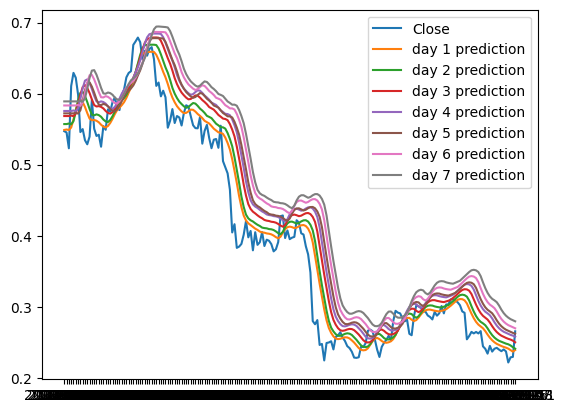

In [16]:
plot_test(scaled_test_df, preds)

In [17]:
new_df = pd.concat((scaled_train_df, scaled_test_df))

In [18]:
dataset = SequenceDataset(new_df, target, features)
loader = DataLoader(dataset, batch_size=8, shuffle=False)

In [19]:
entire_preds = test(lstm, loss_fn, loader)

test loss: 0.00298


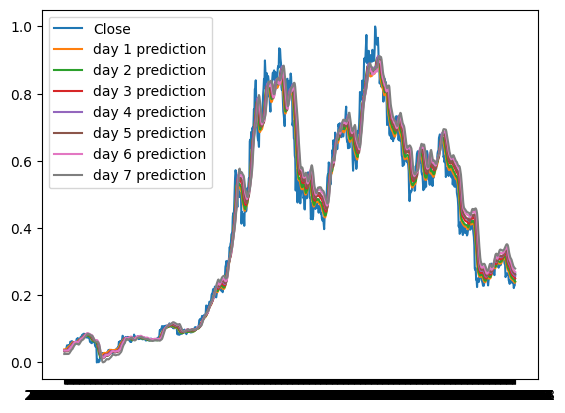

In [20]:
plot_test(new_df, entire_preds)